# Heart Failure Prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


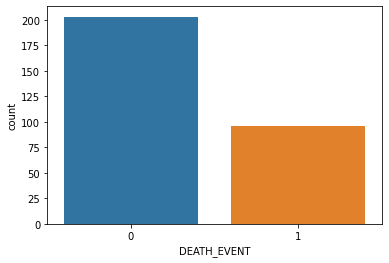

In [4]:
sns.countplot(data['DEATH_EVENT'])

In [16]:
data.groupby('DEATH_EVENT')['DEATH_EVENT'].count()

DEATH_EVENT
0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [7]:
cat_data = [col for col in data.columns if data[col].nunique()<=2 ]
num_data = [col for col in data.columns if data[col].nunique()>2 ]

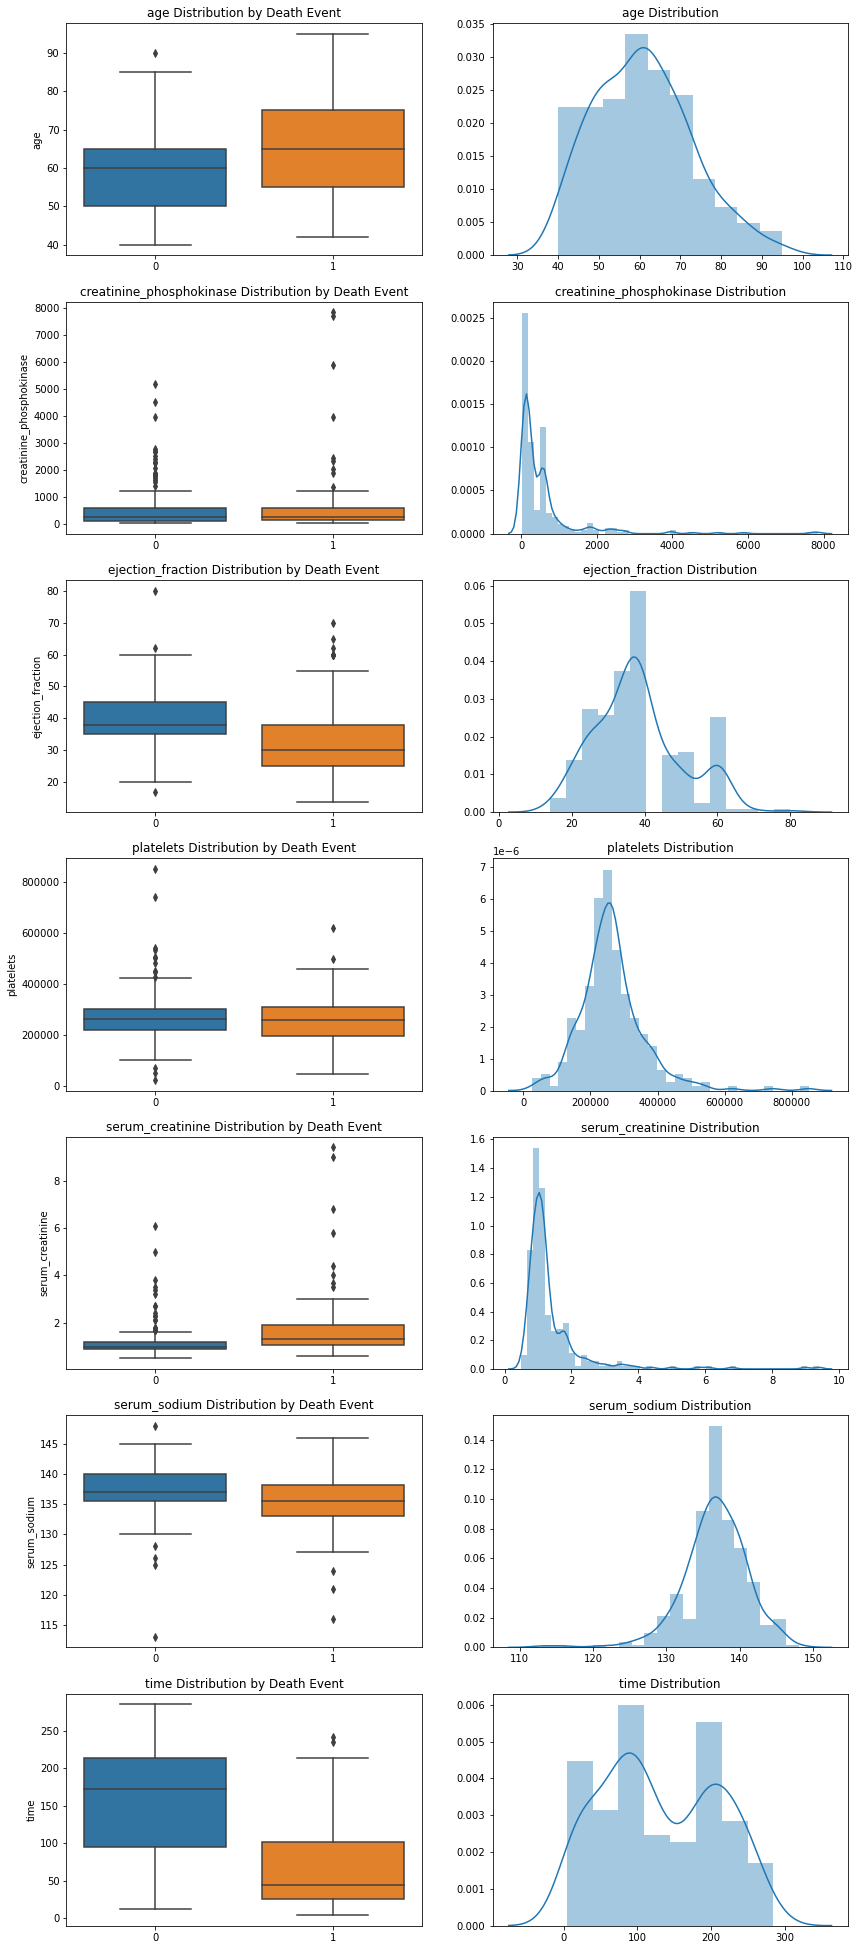

In [8]:
c=1
fig = plt.figure(figsize=(14,35))
for i in num_data:
    plt.subplot(7,2,c)
    sns.boxplot(x=data['DEATH_EVENT'],y=data[i])
    plt.title(i + ' Distribution by Death Event')
    plt.xlabel('')
    c=c+1

    plt.subplot(7,2,c)
    sns.distplot(data[i])
    plt.title(i + ' Distribution')
    plt.xlabel('')
    c=c+1

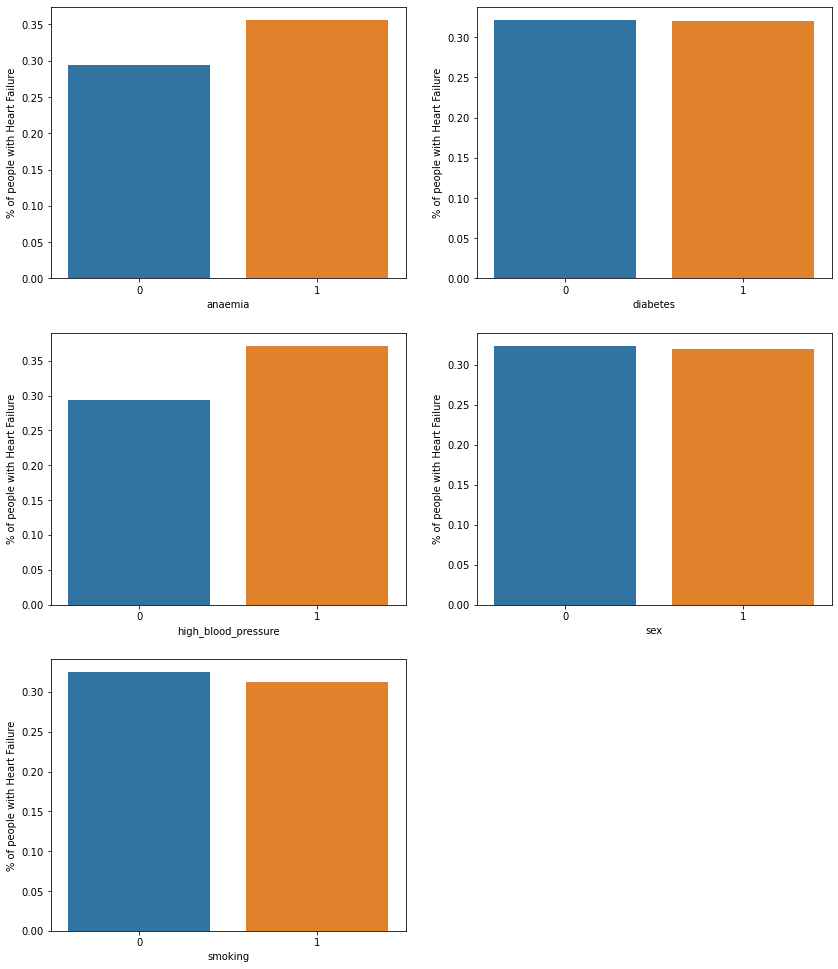

In [9]:
c = 1
fig = plt.figure(figsize=(14,35))
cat_data.remove('DEATH_EVENT')
for i in cat_data:
    newDF = pd.DataFrame(data.groupby(i)['DEATH_EVENT'].mean()).reset_index()
    plt.subplot(6,2,c)
    sns.barplot(x=newDF[i],y=newDF['DEATH_EVENT'])
    plt.ylabel('% of people with Heart Failure')
    c=c+1
    del newDF

In [10]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Data Modeling

#### Decision Tree Classifier

In [14]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [27]:
x = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state = 21)

In [91]:
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=15)
decision_tree.fit(x_train,y_train)
train_score = decision_tree.score(x_train,y_train)
print("Training score :",round(train_score,3))
test_score = decision_tree.score(x_test,y_test)
print("Test score     :",round(test_score,3))
print('Difference :',round(train_score-test_score,3))

Training score : 0.9
Test score     : 0.833
Difference : 0.066


In [100]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=15)
decision_tree.fit(x_train,y_train)
train_score = decision_tree.score(x_train,y_train)
print("Training score :",round(train_score,3))
test_score = decision_tree.score(x_test,y_test)
print("Test score     :",round(test_score,3))
print('Difference :',round(train_score-test_score,3))

Training score : 0.9
Test score     : 0.856
Difference : 0.044


In [101]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=15)
decision_tree.fit(x_train,y_train)
train_score = decision_tree.score(x_train,y_train)
print("Training score :",round(train_score,3))
test_score = decision_tree.score(x_test,y_test)
print("Test score     :",round(test_score,3))
print('Difference :',round(train_score-test_score,3))

Training score : 0.933
Test score     : 0.844
Difference : 0.089


In [96]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=15)
decision_tree.fit(x_train,y_train)
train_score = decision_tree.score(x_train,y_train)
print("Training score :",round(train_score,3))
test_score = decision_tree.score(x_test,y_test)
print("Test score     :",round(test_score,3))
print('Difference :',round(train_score-test_score,3))

Training score : 0.967
Test score     : 0.778
Difference : 0.189


In [97]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=15)
decision_tree.fit(x_train,y_train)
train_score = decision_tree.score(x_train,y_train)
print("Training score :",round(train_score,3))
test_score = decision_tree.score(x_test,y_test)
print("Test score     :",round(test_score,3))
print('Difference :',round(train_score-test_score,3))

Training score : 0.99
Test score     : 0.778
Difference : 0.213


In [98]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=15)
decision_tree.fit(x_train,y_train)
train_score = decision_tree.score(x_train,y_train)
print("Training score :",round(train_score,3))
test_score = decision_tree.score(x_test,y_test)
print("Test score     :",round(test_score,3))
print('Difference :',round(train_score-test_score,3))

Training score : 1.0
Test score     : 0.811
Difference : 0.189


In [99]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=9,random_state=15)
decision_tree.fit(x_train,y_train)
train_score = decision_tree.score(x_train,y_train)
print("Training score :",round(train_score,3))
test_score = decision_tree.score(x_test,y_test)
print("Test score     :",round(test_score,3))
print('Difference :',round(train_score-test_score,3))

Training score : 1.0
Test score     : 0.811
Difference : 0.189


In [102]:
#Using Gridsearch CV for hyper marameter tuning

from sklearn.model_selection import GridSearchCV

In [128]:
params = {'criterion': ['entropy','gini'], 'max_depth': list(range(3,9))}
Decision_Tree = DecisionTreeClassifier(random_state=25)
clf = GridSearchCV(Decision_Tree,params,cv = 10, scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'entropy', 'max_depth': 5}
0.8088095238095239


In [131]:
# Building the model by the parameter determined by Gridsearch CV
Decision_Tree = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=25)
Decision_Tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=25)

In [132]:
y_predicted = Decision_Tree.predict(x_test)

#### Performance Evaluation

In [135]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        68
           1       0.63      0.86      0.73        22

    accuracy                           0.84        90
   macro avg       0.79      0.85      0.81        90
weighted avg       0.87      0.84      0.85        90



Text(33.0, 0.5, 'Actual')

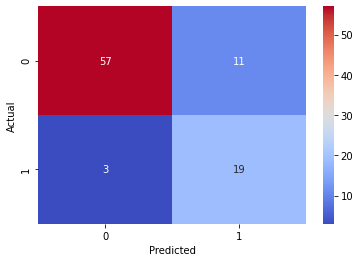

In [143]:
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,cmap="coolwarm")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [153]:
print("Accuracy Score of the model :",round(accuracy_score(y_test,y_predicted)*100,1),"%")

Accuracy Score of the model : 84.4 %


In [173]:
y_prob= Decision_Tree.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_prob)
roc_auc_dt = auc(fpr, tpr)

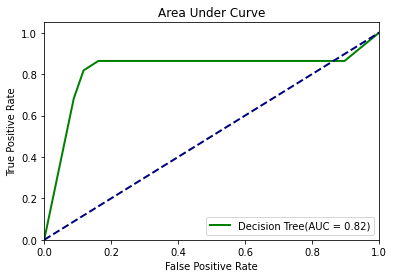

In [175]:
plt.figure(1)
lw = 2
plt.plot(fpr, tpr, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()